<a href="https://www.kaggle.com/code/ramsesmdlc/house-prices-regression?scriptVersionId=136240195" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [36]:
#Import Libraries

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

#from sklearn.base import BaseEstimator, TransformerMixin # base classes (provide common functionality and methods for all transformers and estimators)
#from sklearn.impute import SimpleImputer # completing/replacing missing values
#from sklearn.preprocessing import OneHotEncoder # Machine Learning (One Hot Encoder Categorical Attributes)
#from sklearn.preprocessing import StandardScaler # Machine Learning (Scaling data) - Z-Score Normalization)
#from sklearn.pipeline import Pipeline # Machine Learning (Pipeline class for numerical features)
#from sklearn.compose import ColumnTransformer # Machine Learning (Transformation of: numerical features + categorical attributes)

<div class="alert alert-block alert-warning"><b>Point 0, 1:</b> In following steps we are going to apply several tehcniques, methods or procedures to check and assess the training dataset. Furthermore, in these stages we are not going to modify or edit the training dataset.</div>

# __0. Important__

Type of machine learning system to build:

1. Supervised Learning: __Linear Regression (Gradient Descent)__
2. Batch Learning (also called "offline learning")
3. Model-based learning

Goal:
1. __Predict the "sales price" for each house__

# __1. Loading the Data - Training Dataset__

In [37]:
training_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

# __2. Exploratory Data Analysis (EDA) - Training Dataset (Dependent Feature)__

# __3. Quick Exploratory Data Analysis (QEDA) - Training Dataset (Independent Features - Metric Variables)__

There are a lot of variables of different types (object, int64, and float64) in the training set (80 to be precise). Therefore, conducting an exhaustive exploratory data analysis (EDA) of all features may not be worthwhile. 

> Non-metric variable = attributes, characteristics or categorical properties = type "object"

> Metric variables = quantitavive data = type "int64" and/or type "float64".

The best approach would be to quickly identify the independent features (metric variables, to be precise) that have a strong "Correlation Coefficient" (to be specific "Pearson" and/or "Spearman") with the dependent feature "SalePrice" and use them to develop the model. 

1. Pearson correlation coefficient:

> It is computed using "raw data" values.

> Assumption N°1: Data from both variables follow normal distributions.

> Assumption N°2: Data have no outliers.

> Assumption N°3: Data is from a random or representative sample.

> Assumption N°4: Expect a "linear" relationship between the two variables

2. Spearman correlation coefficient: 

> It is used when data fail to meet the assumptions of "Pearson correlation coefficient"

> It is computed from the "ranks" (e.g., from lowest to highest) of the data. For instance, if we have a set of data X1 = [400 100 300 200 10], then this set of data could be ranked as X1_Ranked = [5 2 4 3 1]; or a set of data X2 = [10 20 30 40 50], then this set of data could be ranked as X2_Ranked = [1 2 3 4 5]

> It measures the "monotonicity of relationships" (which are less restrictive than linear relationships) between a pair of variables. Each variable changes in only one direction but not necessarily at the same rate. 

>Positive monotonic: when one variable increases, the other also increases (it does not have to be linear).

>Negative monotonic: when one variable increases, the other decreases. (it does not have to be linear).

__<span style="color:red">It is important to note that "non-metric variables" have been neglected in this section.</span>__

In [38]:
def QEDA(training_data):  
  # Print the "shape" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Shape of the dataframe:",'\033[0m', training_data.shape, "\n")
  
  # Print the "general information" of the dataframe
  print("\n", '\033[1m','\033[94m',"Information of the dataframe:",'\033[0m', "\n")
  training_data.info()
    
  # Print the "Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient") of the metric variables" of the dataframe
      #The code "select_dtypes" allow us to choose data points of the dataframe with specific datatypes.
          #In this case we are interested in datatypes of "int64" and "float64"
      #The output will be a "Series"  
  print("\n" +'\033[1m','\033[94m', "Standard Correlation Coefficient Pearson of the metric variables:", '\033[0m' + "\n")
  matrix_selection = training_data.select_dtypes(include=['int64',"float64"]) 
  corr_Pearson_matrix1 = matrix_selection.corr()
  corr_Pearson_serie = corr_Pearson_matrix1["SalePrice"].sort_values(ascending=False)
  print(corr_Pearson_serie)
  
  # Print the "Spearman's Rank Correlation Coefficient of the metric variables" of the dataframe
      #The output will be a "Series"  
  print("\n" +'\033[1m','\033[94m', "Spearman's Rank Correlation Coefficient of the metric variables:", '\033[0m' + "\n")
  matrix_selection = training_data.select_dtypes(include=['int64',"float64"]) 
  corr_Spearman_matrix1 = matrix_selection.corr(method="spearman")
  corr_Spearman_serie = corr_Spearman_matrix1["SalePrice"].sort_values(ascending=False)
  print(corr_Spearman_serie)

  # Print the dataframe to contrast the "Pearson's Correlation Coefficient" vs "Spearman's Rank Correlation Coefficient on metric variables"
    #Transforming the Serie to a Dataframe
    #Reseting the index of he dataframe 
    #Changing the head of the dataframe
  corr_Pearson_df = pd.DataFrame(corr_Pearson_serie)
  corr_Spearman_df = pd.DataFrame(corr_Spearman_serie)

  corr_Pearson_df.reset_index(inplace=True)
  corr_Spearman_df.reset_index(inplace=True)

  corr_Pearson_df = corr_Pearson_df.rename(columns = {"index":"Metric Variable","SalePrice":"Pearson Correlation"})
  corr_Spearman_df = corr_Spearman_df.rename(columns = {"index":"Metric Variable","SalePrice":"Spearman Correlation"})

  print("\n" +'\033[1m','\033[94m', "Pearson vs Spearman Correlation Coefficient", '\033[0m' + "\n")
  corr_compare_df = pd.concat([corr_Pearson_df, corr_Spearman_df], axis=1)
  print(corr_compare_df.head(13))

# Call the function
QEDA(training_data)


  Shape of the dataframe:  (1460, 81) 


   Information of the dataframe:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     146

## __3.1. Conclusions__

1. Considering that out of the top 12 metric variables (i.e., metric variables with a "Correlation Coefficient" > 0.50), 11 have a "linear correlation" (according to the "Pearson Correlation Coefficient"), we can develop a "linear model" without significant issues. 

2. To be specifc we are going to develop the EDA of the top 12 metric variables (according to the "Pearson Correlation Coefficient").

# __4. Exploratory Data Analysis (EDA) - Training Dataset (Independent Features - Metric Variables)__

In [46]:
#Defining the training dataset to be use for fo the EDA
    #This definition is based on the results of section "3. Quick Exploratory Data Analysis (QEDA) - Training Dataset (Independent Features - Metric Variables)"
    #To be specific we choose onlythe columns with metric variables and high ""Pearson Correlation Coefficient""
matrix_selection = training_data.select_dtypes(include=['int64',"float64"]) 
training_dataX = matrix_selection[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd","GarageYrBlt","MasVnrArea"]]


  Shape of the dataframe:  (1460, 12) 

  Head of the dataframe:  

   OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7       1710           2         548          856       856   
1            6       1262           2         460         1262      1262   
2            7       1786           2         608          920       920   
3            7       1717           3         642          756       961   
4            8       2198           3         836         1145      1145   

   FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  MasVnrArea  
0         2             8       2003          2003       2003.0       196.0  
1         2             6       1976          1976       1976.0         0.0  
2         2             6       2001          2002       2001.0       162.0  
3         1             7       1915          1970       1998.0         0.0  
4         2             9       2000          2000       2000.0       350.0  

   In

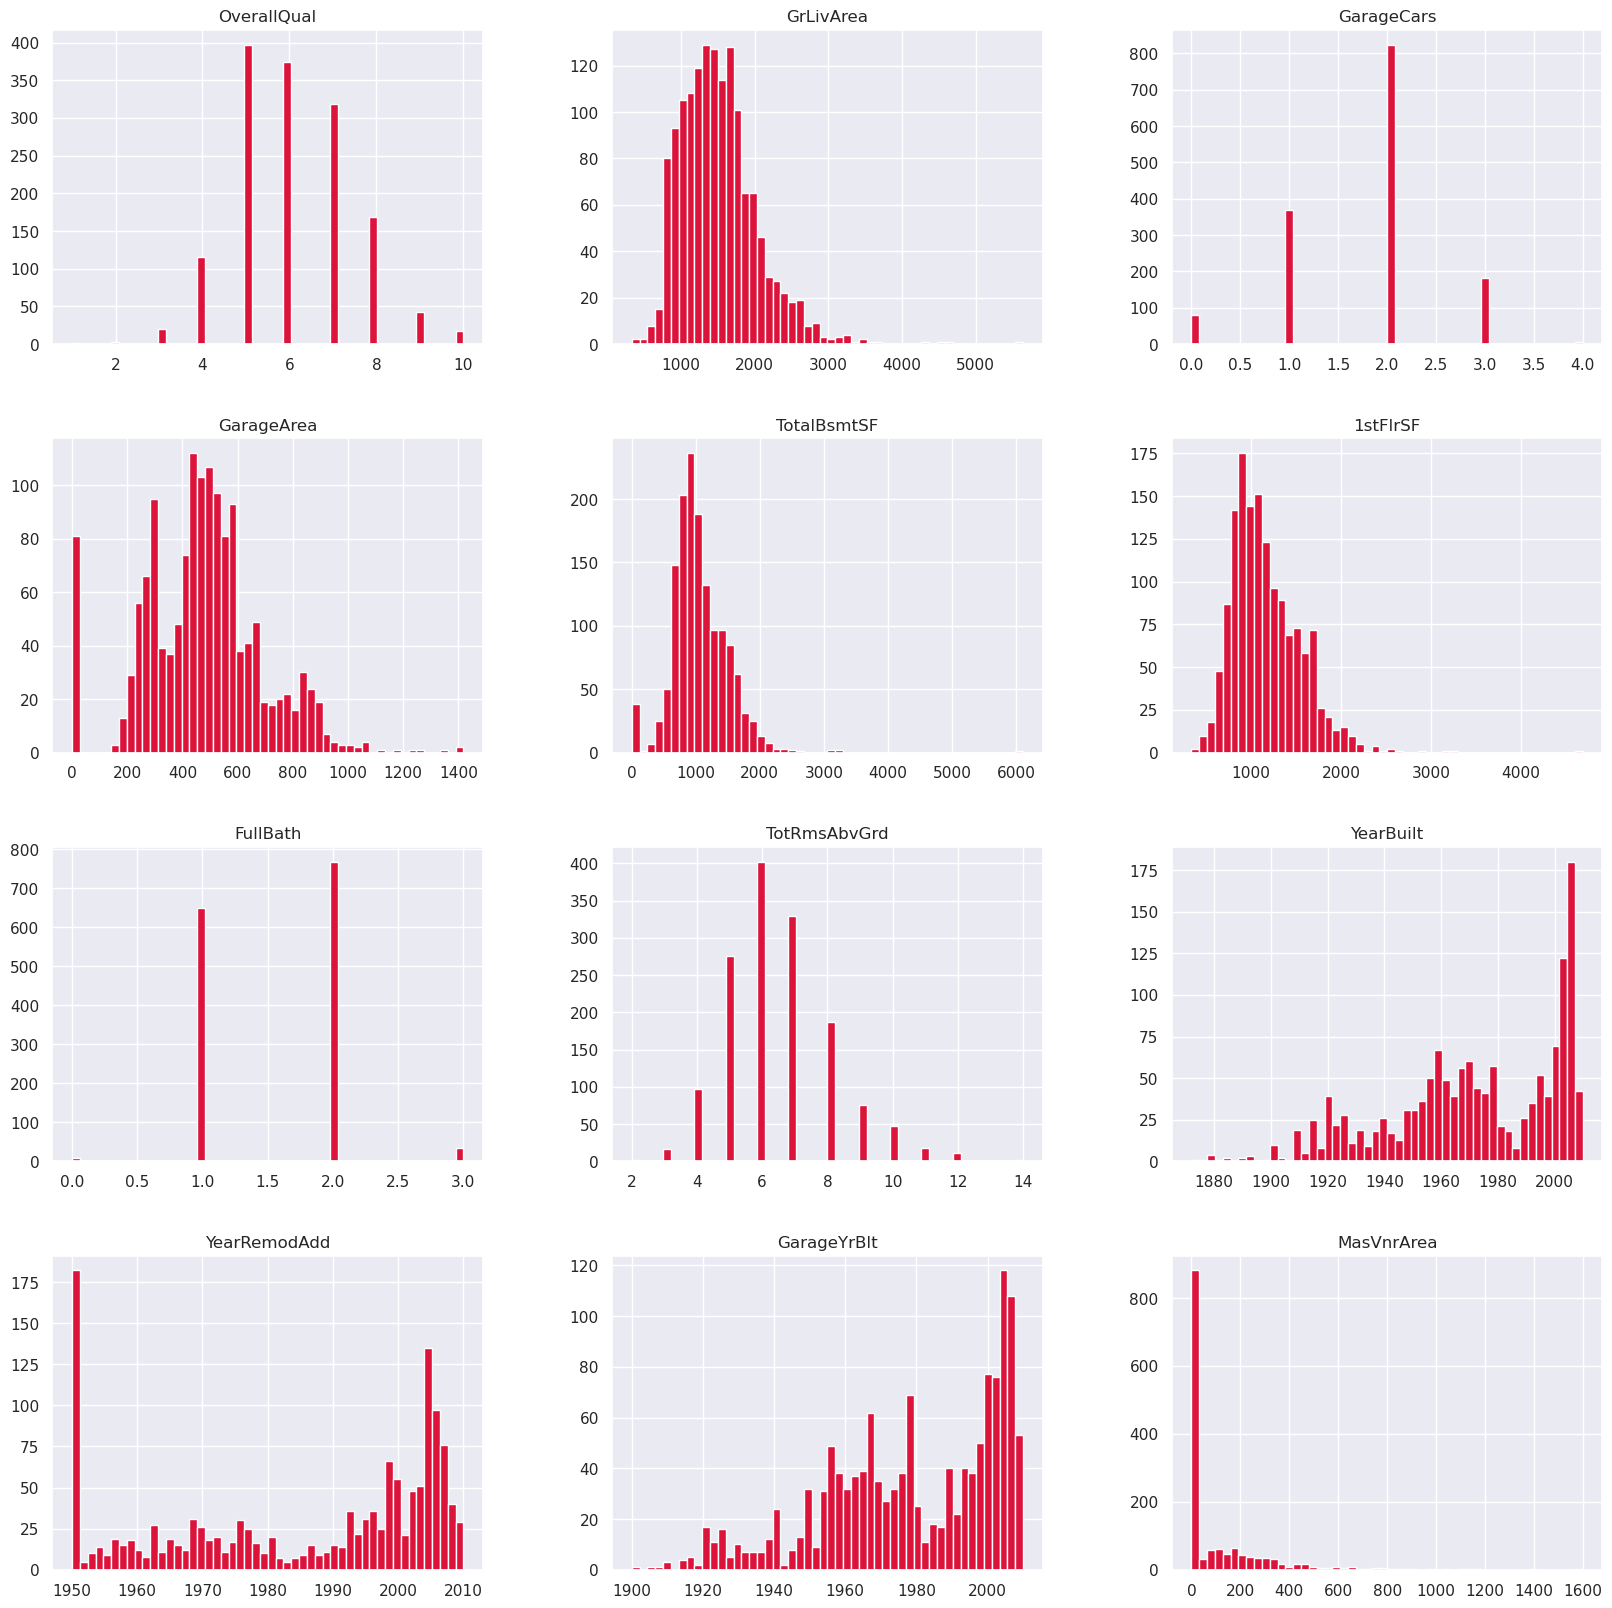


  Boxplots for the numerical columns: 



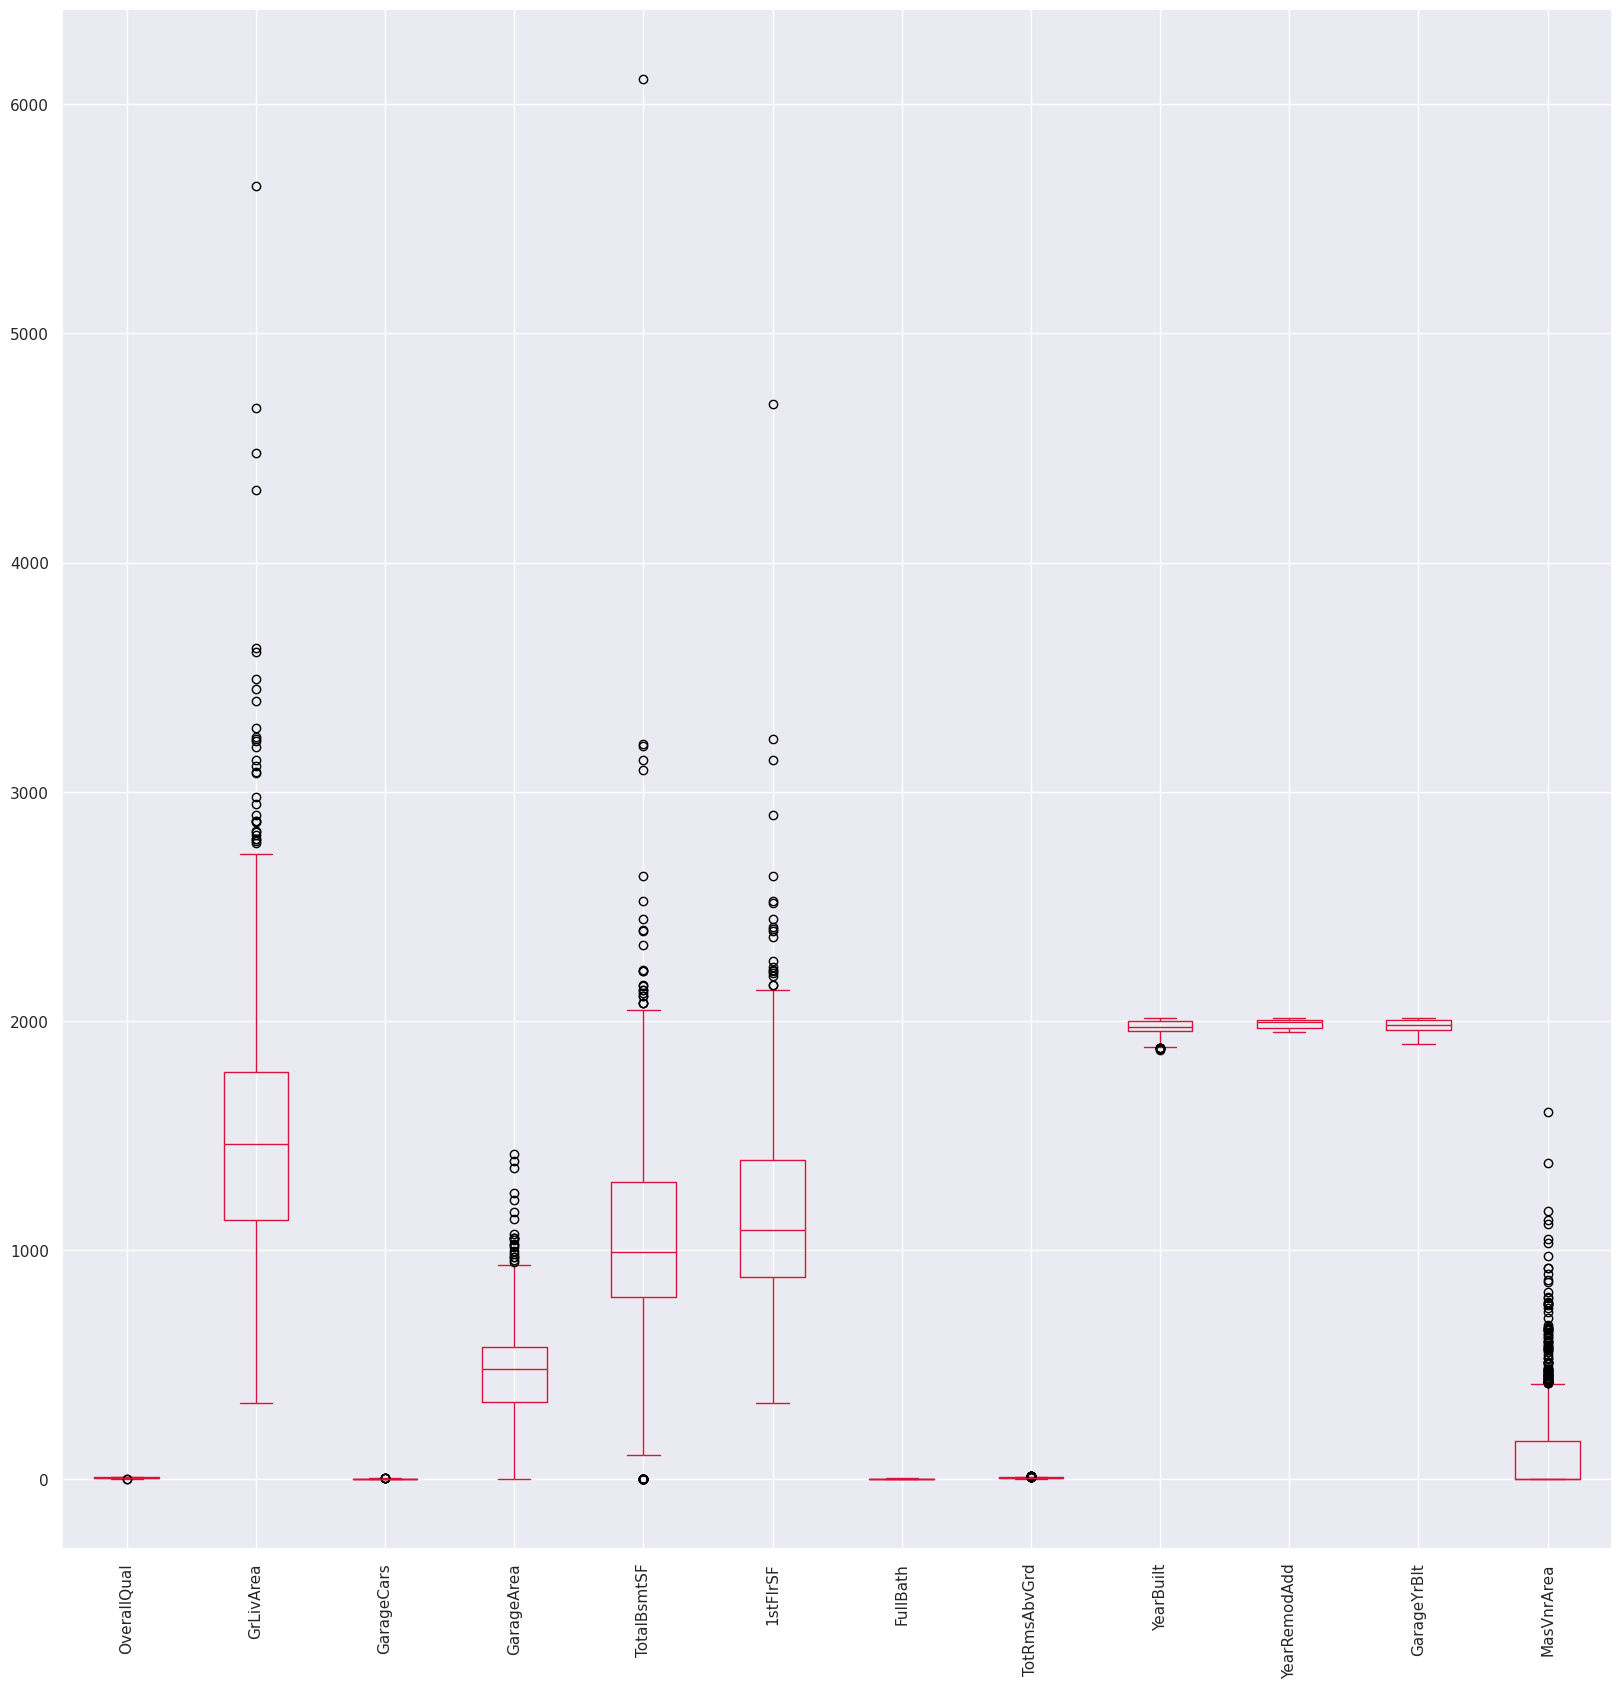


  Standard Correlation Coefficient of the numerical columns: 

              OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
OverallQual      1.000000   0.593007    0.600671    0.562022     0.537808   
GrLivArea        0.593007   1.000000    0.467247    0.468997     0.454868   
GarageCars       0.600671   0.467247    1.000000    0.882475     0.434585   
GarageArea       0.562022   0.468997    0.882475    1.000000     0.486665   
TotalBsmtSF      0.537808   0.454868    0.434585    0.486665     1.000000   
1stFlrSF         0.476224   0.566024    0.439317    0.489782     0.819530   
FullBath         0.550600   0.630012    0.469672    0.405656     0.323722   
TotRmsAbvGrd     0.427452   0.825489    0.362289    0.337822     0.285573   
YearBuilt        0.572323   0.199010    0.537850    0.478954     0.391452   
YearRemodAdd     0.550684   0.287389    0.420622    0.371600     0.291066   
GarageYrBlt      0.547766   0.231197    0.588920    0.564567     0.322445   
MasVnrArea  

KeyError: 'SalePrice'

In [45]:
def EDA(training_dataX):  
  # Print the "shape" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Shape of the dataframe:",'\033[0m', training_dataX.shape, "\n")
    
  # Print the "head" of the dataframe
  print('\033[1m','\033[94m',"Head of the dataframe:",'\033[0m', "\n")
  print(training_dataX.head())
  
  # Print the "general information" of the dataframe
  print("\n", '\033[1m','\033[94m',"Information of the dataframe:",'\033[0m', "\n")
  training_dataX.info()
 
  # Print the "number and percentage" of missing values per column" of the dataframe
  print("\n" +'\033[1m','\033[94m', "Number and percentage of missing values per column:", '\033[0m' + "\n")
  missing = training_dataX.isnull().sum()
  percent = missing / training_dataX.shape[0] * 100
  print(pd.concat([missing, percent], axis=1, keys=["Missing", "Percent"]))

  # Print the "summary statistics of the numerical columns" of the dataframe
  print("\n" +'\033[1m','\033[94m', "Summary statistics of the numerical columns:", '\033[0m' + "\n")
  print(training_data.describe())  
    
  # Plot "histograms for the numerical columns" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Histograms for the numerical columns:", '\033[0m' + "\n")
  training_dataX.hist(bins= 50, figsize=(20,20),color= "Crimson")
  plt.show()  
    
  # Plot "boxplots for the numerical columns" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Boxplots for the numerical columns:", '\033[0m' + "\n")
  training_dataX.boxplot(figsize=(20,20), rot=90, color= "Crimson")
  plt.show()
  
  # Print the "Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient") of the numerical columns" of the dataframe
  print("\n" +'\033[1m','\033[94m', "Standard Correlation Coefficient of the numerical columns:", '\033[0m' + "\n")
  print(training_dataX.corr())    
  
  print(training_dataX.corr()["SalePrice"].sort_values(ascending=False))
    
  # Plot "heatmap of the Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient") of the numerical columns" of the dataframe
  print("\n" +'\033[1m','\033[94m', "Correlation matrix for the numerical columns:", '\033[0m' + "\n")
  corr = training_dataX.corr()
  sns.set(rc={"figure.figsize":(30, 30)}) #width=20, height=20
  #sns.heatmap(corr, annot = True, cmap="Spectral")
  sns.heatmap(corr, vmax=.8, cmap="Spectral")
  plt.show()

  k = 11 #number of variables for heatmap
  cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
  cm = np.corrcoef(training_dataX[cols].values.T)
  sns.set(font_scale=1)
  hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)
  plt.show()
    
# Call the function
EDA(training_dataX)

## <span style="color:red"> __THIS IS AN UNFINISHED NOTEBOOK! - I AM STILL WORKING ON IT__</span>


# __3. Quick Exploratory Data Analysis (QEDA) - Training Dataset (Independent Features - Metric Variables)__# __5. Exploratory Data Analysis (EDA) - Training Dataset (Independent Features - Nonmetric Variables)__